# Sentiment Analysis

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv(r"Test.csv")

In [3]:

dataset.head(3)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0


In [4]:
dataset.shape

(5000, 2)

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
from nltk.tokenize.treebank import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

In [8]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [9]:
from nltk.corpus import stopwords

stop_word_english = stopwords.words('english')

from string import punctuation

extra_word = ["``", "''" ]

stop_word = list(punctuation) + stop_word_english + extra_word



In [10]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# and stemmer.stem(word)

In [11]:
import nltk
# nltk.download('wordnet')


In [12]:
def preprocess_text(text):
         
    tokens = tokenizer.tokenize(text.lower())
    
    # remove stopword and apply lemmatize for root word
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_word and word.isalpha()]
    
    return ' '.join(cleaned_tokens)


dataset['cleaned_text'] = dataset['text'].apply(preprocess_text)

print(dataset[['text', 'cleaned_text', 'label']].head())


                                                text  \
0  I always wrote this series off as being a comp...   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...   
2  This movie was so poorly written and directed ...   
3  The most interesting thing about Miryang (Secr...   
4  when i first read about "berlin am meer" i did...   

                                        cleaned_text  label  
0  always wrote series complete jim belushi invol...      0  
1  watched purcell typical mary kate ashley fare ...      0  
2  movie poorly written directed fell asleep minu...      0  
3  interesting thing miryang secret sunshine jeon...      1  
4  first read berlin meer expect thought right pe...      0  


In [13]:
dataset.head(3)

,text,label,cleaned_text
0,I always wrote this series off as being a comp...,0,always wrote series complete jim belushi invol...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,watched purcell typical mary kate ashley fare ...
2,This movie was so poorly written and directed ...,0,movie poorly written directed fell asleep minu...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
x = vectorizer.fit_transform(dataset['cleaned_text'])

In [15]:
dense_matrix = x.toarray()  
print(dense_matrix[:5, :5])


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [16]:
"""Get non-zero elements and their indices"""
# non_zero_elements = x.nonzero()

# # View the non-zero elements and their indices
# for row, col in zip(non_zero_elements[0], non_zero_elements[1]):
#     print(f"Document {row}, Term {col} -> TF-IDF: {x[row, col]}")


'Get non-zero elements and their indices'

In [17]:
y = dataset["label"]

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6)

# 5 for svc
# 6 for logisticRegression
# 8 for decisiontreeClassifier
# 17 for KNeighborsClassifier
# 3 for RandomForestClassifier


# VotingClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

li = [("lr1", LogisticRegression()), (("rf1"), RandomForestClassifier()), (("sv1"), SVC())]

vr = VotingClassifier(li)  #, weights=[10, 20, 20]
vr.fit(x_train, y_train)

VotingClassifier(estimators=[('lr1', LogisticRegression()),
                             ('rf1', RandomForestClassifier()),
                             ('sv1', SVC())])

In [20]:

vr.score(x_test, y_test)*100  , vr.score(x_train, y_train)*100

(85.0, 99.71428571428571)

In [21]:
from sklearn.metrics import confusion_matrix

cm6 = confusion_matrix(y_test, vr.predict(x_test))
cm6

array([[612, 148],
       [ 77, 663]], dtype=int64)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 

cv_scores = cross_val_score(lr, x_train, y_train, cv=7)

lr.fit(x_train, y_train)

lr.score(x_test, y_test)*100  , lr.score(x_train, y_train)*100

# overfitting = train > test


(85.0, 94.77142857142857)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

lr = LogisticRegression() 

cv_scores = cross_val_score(lr, x_train, y_train, cv=7)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


lr.fit(x_train, y_train)

cv_scores = cross_val_score(lr, x, y, cv=kf, scoring='accuracy')

cv_scores*100, cv_scores.mean(),  cv_scores.std()

# overfitting = train > test


(array([84.6, 85.7, 85. , 84.7, 84.7]),
 0.8493999999999999,
 0.00402988833592198)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

base_model = lr = LogisticRegression()

bag_model = BaggingClassifier(estimator= base_model, n_estimators= 50, random_state= 42, )

cv_scores = cross_val_score(bag_model, x_train, y_train, cv=7)

bag_model.fit(x_train, y_train)

bag_model.score(x_test, y_test)*100  , bag_model.score(x_train, y_train)*100



(84.46666666666667, 93.82857142857142)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

base_model = lr = LogisticRegression()

bag_model = AdaBoostClassifier(estimator= base_model, n_estimators= 50, random_state= 42, )

cv_scores = cross_val_score(bag_model, x_train, y_train, cv=7)

bag_model.fit(x_train, y_train)

bag_model.score(x_test, y_test)*100  , bag_model.score(x_train, y_train)*100



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

(73.86666666666667, 78.48571428571428)

In [26]:
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

base_modal = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svc', SVC(probability= True))
]

meta_model = LogisticRegression()

stack_model = StackingClassifier(estimators= base_modal, final_estimator= meta_model)

stack_model.fit(x_train, y_train)

stack_model.score(x_test, y_test)*100  , stack_model.score(x_train, y_train)*100



(85.26666666666667, 99.77142857142857)

In [27]:
cv_scores*100, np.mean(cv_scores) * 100

(array([71.2, 73.8, 75. , 76. , 69.6, 72.8, 77.4]), 73.68571428571428)

In [28]:
from sklearn.model_selection import GridSearchCV

param_lr = {
    'max_iter': [100, 200, 500],  # Number of features to select
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
    'solver': ['saga', 'liblinear', 'sag', 'lbfgs'],  # Solvers
    'multi_class': ['auto', 'ovr', 'multinomial']

}

grid_search = GridSearchCV(estimator= lr, param_grid= param_lr, cv=2, verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_params

Fitting 2 folds for each of 540 candidates, totalling 1080 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
600 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData

{'C': 10,
 'max_iter': 500,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'saga'}

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm2 = confusion_matrix(y_test, lr.predict(x_test))
cm2

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [25]:
from sklearn.metrics import classification_report

y_pred = lr.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.84       760
           1       0.82      0.90      0.85       740

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



In [26]:
# for i in np.arange(0.01, 1.0, 0.01):
    
#     lr = LogisticRegression(C=i)
#     lr.fit(x_train, y_train)
#     knp = lr.score(x_test, y_test)*100
#     knp1 = lr.score(x_train, y_train)*100
    
#     print(knp, knp1, {knp1 - knp}, i)

In [27]:
# for i in range(1, 70):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     lr = LogisticRegression()
#     lr.fit(x_train, y_train)
#     knp = lr.score(x_test, y_test)*100
#     knp1 = lr.score(x_train, y_train)*100
    
#     print(knp, knp1, {knp1 - knp}, i)

# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)*100  , rfc.score(x_train, y_train)*100

(70.93333333333334, 99.28571428571429)

In [29]:
cm4 = confusion_matrix(y_test, lr.predict(x_test))
cm4

array([[612, 148],
       [ 77, 663]])

In [30]:
# for i in range(1, 70):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     rfc = RandomForestClassifier(n_estimators=10)
#     rfc.fit(x_train, y_train)
#     knp = rfc.score(x_test, y_test)*100
#     knp1 = rfc.score(x_train, y_train)*100
    
#     print(knp, knp1, {knp1 - knp}, i)

# SVC model 

In [31]:
from sklearn.svm import SVC

sv = SVC(kernel="sigmoid")
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100  , sv.score(x_train, y_train)*100


(85.53333333333333, 95.94285714285714)

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, sv.predict(x_test))
cm

array([[632, 128],
       [ 89, 651]])

In [33]:
"""GridSearchCV"""


# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     'degree':[i for i in range(1, 10)]
# }

# grid_search = GridSearchCV(estimator=sv, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(x_train, y_train)

# grid_search.best_score_
# grid_search.best_params_

'GridSearchCV'

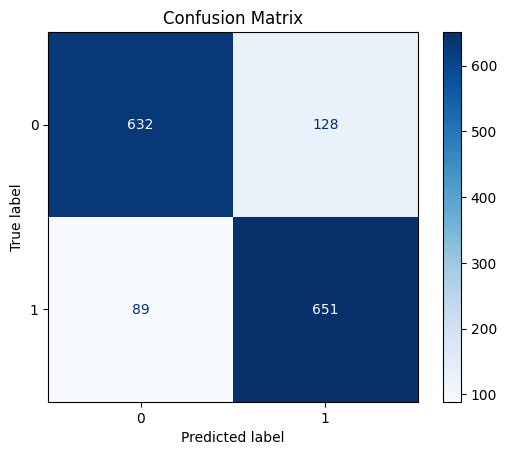

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [35]:
# for i in range(1, 70):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     sv = SVC(kernel="sigmoid")
#     sv.fit(x_train, y_train)
#     knp = sv.score(x_test, y_test)*100
#     knp1 = sv.score(x_train, y_train)*100
    
#     print(knp, knp1, {knp1 - knp}, i)

# KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors= 41)
kn.fit(x_train, y_train)

kn.score(x_test, y_test)*100  , kn.score(x_train, y_train)*100


(74.2, 75.68571428571428)

In [37]:
# for i in range(1, 70):
#     kn = KNeighborsClassifier(n_neighbors= i)
#     kn.fit(x_train, y_train)
#     knp = kn.score(x_test, y_test)*100
#     knp1 = kn.score(x_train, y_train)*100
    
#     print(knp, knp1, {knp1 - knp}, i)

In [38]:
cm3 = confusion_matrix(y_test, kn.predict(x_test))
cm3

array([[660, 100],
       [287, 453]])

In [39]:
# for i in range(1, 70):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     kn = KNeighborsClassifier(n_neighbors= 3)
#     kn.fit(x_train, y_train)
#     knp = kn.score(x_test, y_test)*100
#     knp1 = kn.score(x_train, y_train)*100
    
#     print(knp, knp1, {knp1 - knp}, i)

# DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0,
    splitter='best'
)

# Fit the model
clf.fit(x_train, y_train)

# Evaluate the model
train_score = clf.score(x_train, y_train) * 100
test_score = clf.score(x_test, y_test) * 100

train_score, test_score

(52.457142857142856, 50.13333333333333)

In [41]:
cm1 = confusion_matrix(y_test, clf.predict(x_test))
cm1

array([[ 34, 726],
       [ 22, 718]])

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(1, 10, 1)],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_weight_fraction_leaf': [0],
    'max_features': ['auto', 'sqrt', 'log2'],
    # 'random_state': [i for i in range(1, 40, 1)],
    # 'max_leaf_nodes': [],
    # 'min_impurity_decrease': [0],
    # 'class_weight': [],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
151 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                                              min_weight_fraction_leaf=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0],
                         'splitter': ['best', 'random']},
             verbose=2)

In [43]:
best_score = grid_search.best_score_
best_score


np.float64(0.6008571428571428)

In [44]:
best_params = grid_search.best_params_
best_params


{'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'splitter': 'best'}

In [45]:
# for i in range(1, 70):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     clf = DecisionTreeClassifier(max_depth=2)
#     clf.fit(x_train, y_train)
#     knp = clf.score(x_test, y_test)*100
#     knp1 = clf.score(x_train, y_train)*100
    
#     print(knp, knp1, {knp1 - knp}, i)

# check the model output

vr = VotingClassifier

lr = logisticRegression
rfc = RandomForestClassifier
sv = SVC

In [46]:
# Test on new examples
test_texts = [
    "I enjoy during sunny days",
    "I hate coding errors",
    "This man is bad",
    "your rice is nice",
    "anuj is good boy"
]

test_texts_transformed = vectorizer.transform(test_texts)

# Make predictions
predictions = lr.predict(test_texts_transformed)

# Display the predictions
for text, prediction in zip(test_texts, predictions):
    print(f"Text: '{text}' - Prediction: {'Positive' if prediction == 1 else 'Negative'}")

Text: 'I enjoy during sunny days' - Prediction: Positive
Text: 'I hate coding errors' - Prediction: Positive
Text: 'This man is bad' - Prediction: Negative
Text: 'your rice is nice' - Prediction: Positive
Text: 'anuj is good boy' - Prediction: Positive
